In [1]:
from pathlib import Path
import sys

root = Path.cwd()
while not (root / "utils_v7").exists() and root != root.parent:
    root = root.parent
sys.path.insert(0, str(root))

from utils_v7.main3 import (run_langraph)

C:\Users\playdata\Documents\1_ai\LLM_hybrid\utils_v7\retriever.py:51: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vs = Chroma(


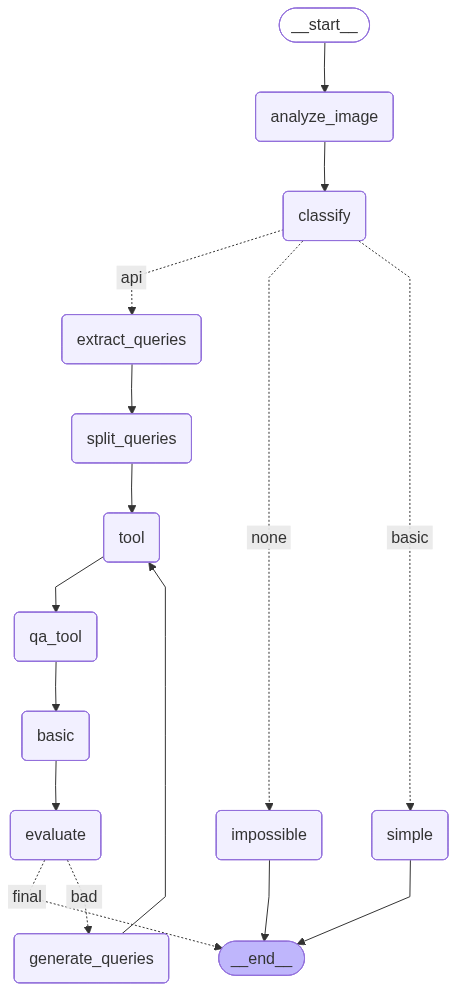

In [2]:
from utils_v7.langgraph_setting2 import graph_setting

graph = graph_setting()

graph

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
# 필요한 라이브러리 임포트
import os
import pandas as pd
from pprint import pprint
# LangChain 관련 라이브러리
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
# RAGAS 관련 라이브러리
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from ragas.testset.persona import Persona
from ragas.testset import TestsetGenerator
from ragas import EvaluationDataset, evaluate
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness

## 이미 만들어진 데이터셋 사용 시 스킵

## 이미 생성된 합성 데이터셋 생성

In [4]:
import pandas as pd

file_path = './dataset.csv'
dataset_df = pd.read_csv(file_path)
pd.set_option('display.max_colwidth', None)

dataset_df.head()

,user_input,reference_contexts,reference
0,Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?,"사용자가 다음 작업을 수행할 수 있게 해주는 Analytics Hub 게시자 역할(roles/analyticshub.publisher)\r\n\r\n목록 생성, 업데이트, 삭제\r\n목록에 IAM 정책 설정\r\n이 역할을 가진 사용자를 게시자라고 합니다.\r\n\r\n사용자가 다음 작업을 수행할 수 있게 해주는 Analytics Hub 목록 관리자 역할(roles/analyticshub.listingAdmin)\r\n\r\n목록 업데이트 및 삭제\r\n목록에 IAM 정책 설정","Analytics Hub 게시자 역할은 목록을 생성, 업데이트, 삭제하고 목록에 IAM 정책을 설정할 수 있습니다. 반면, Analytics Hub 목록 관리자 역할은 목록을 업데이트 및 삭제하고 목록에 IAM 정책을 설정할 수 있지만, 목록을 생성하는 권한은 없습니다. 즉, 게시자는 목록 생성 권한이 추가로 부여된다는 점이 주요 차이점입니다."
1,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해야 하나요?,BigQuery Studio 저장된 쿼리에 공개 액세스 권한이 부여되지 않도록 하려면 프로젝트에서 allAuthenticatedUsers 주 구성원을 제한합니다.\r\n\r\n프로젝트에서 allAuthenticatedUsers를 제한하려면 iam.allowedPolicyMemberDomains 정책을 설정하고 allowed_values 목록에서 allAuthenticatedUsers를 삭제하면 됩니다.\r\niam.allowedPolicyMemberDomains 정책에서 allAuthenticatedUsers를 제한하면 프로젝트의 모든 IAM 정책에서 allAuthenticatedUsers 주 구성원을 사용할 수 없으므로 BigQuery Studio 저장된 쿼리를 비롯한 모든 리소스에 대한 공개 액세스 권한이 부여되지 않습니다.,"BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 프로젝트에서 allAuthenticatedUsers 주 구성원을 제한해야 합니다. 이를 위해 iam.allowedPolicyMemberDomains 정책을 설정하고 allowed_values 목록에서 allAuthenticatedUsers를 삭제하면 됩니다. 이 정책을 적용하면 프로젝트의 모든 IAM 정책에서 allAuthenticatedUsers 주 구성원을 사용할 수 없으므로, BigQuery Studio 저장된 쿼리를 비롯한 모든 리소스에 대한 공개 액세스 권한이 부여되지 않습니다."
2,calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?,현재 로그인한 사용자의 기본 캘린더에 액세스하려면 'primary' 키워드를 사용하세요.,calendarId에 primary 키워드를 사용하면 현재 로그인한 사용자의 기본 캘린더에 접근할 수 있습니다.
3,Google Drive API v3의 서비스 엔드포인트가 궁금해,"이 서비스에는 다음 서비스 엔드포인트가 포함되고, 그 아래의 모든 URI가 이 서비스 엔드포인트와 관련됩니다. https://www.googleapis.com",Google Drive API v3의 서비스 엔드포인트는 https://www.googleapis.com 입니다.
4,files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 무엇인가요?,"최대 파일 크기: 5,120GB\r\n허용되는 미디어 MIME 유형: */*\r\n(리터럴 */* 값 대신 유효한 MIME 유형을 지정하세요. 리터럴 */*는 유효한 MIME 유형을 업로드할 수 있음을 나타내는 데만 사용됩니다.","files.create 메서드의 최대 파일 크기는 5,120GB입니다. 허용되는 미디어 MIME 유형은 */*로, 이는 모든 유효한 MIME 유형을 업로드할 수 있음을 의미합니다. 단, 실제로는 리터럴 */* 대신 유효한 MIME 유형을 지정해야 합니다."


In [5]:

## 02.RAG 체인 구성

import pandas as pd
from datasets import Dataset
import uuid
import time

evaluated_dataset = []

for _, row in dataset_df.iterrows():
    query = row.user_input  # 사용자 입력 - 합성 데이터셋에서 가져옴
    time.sleep(1)
    
    # run_langraph 함수 호출
    rag_result = run_langraph(query,'1', None)

    evaluated_dataset.append(
        {
            "user_input": query,
            "retrieved_contexts": [doc for doc in rag_result["search_results"]],
            "response": rag_result["answer"],
            "reference": row['reference']
        }
    )

print("평가 데이터셋 준비 완료")

# RAGAS 평가 데이터셋 생성
v7_evaluated_dataset = Dataset.from_list(evaluated_dataset)

run_langraph 호출 - 입력: Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?, 이미지: False
analyze_image 호출됨 - 이미지 존재: False
[tool_based_search_node] 실행 - queries=['Analytics Hub에서 게시자와 목록 관리자 역할의 차이점은 무엇인가요?']
[vector_search_tool] 검색 중: 'Analytics Hub에서 게시자와 목록 관리자 역할의 차이점은 무엇인가요?' with filters: {'tags': {'$in': ['bigquery']}}
[tool_based_search_node] 실행 - state['search_results']=['데이터 교환을 생성, 업데이트, 삭제합니다.\n목록을 생성, 업데이트, 삭제, 공유\nAnalytics Hub 관리자, 목록 관리자, 게시자, 구독자, 뷰어를 관리합니다.\n이 역할을 가진 사용자는 관리자라고 합니다.\nAnalytics Hub 게시자 및 목록 관리자 역할\nSharing은 목록을 관리 [https://cloud.google.com/bigquery/docs/analytics-hub-manage-listings?hl=ko]할 수 있도록 프로젝트, 데이터 교환 또는 목록에 부여할 수 있는 다음과 같은 사전 정의된 역할을 제공합니다.\n사용자가 다음 작업을 수행할 수 있게 해주는 Analytics Hub 게시자 역할(roles/analyticshub.publisher)\n목록 생성, 업데이트, 삭제\n목록에 IAM 정책 설정 [https://cloud.google.com/bigquery/docs/analytics-hub-grant-roles?hl=ko#grant-role-listing]\n이 역할을 가진 사용자를 게시자라고 합니다.\n사용자가 다음 작업을 수행할 수 있게 해주는 Analytics Hub 목록 관리자 역할(roles/analyticshub.listingAdmin)\n목록 업데이트 및 

In [6]:
v7_evaluated_dataset = v7_evaluated_dataset.to_pandas()

In [7]:
# csv 데이터 저장
v7_evaluated_dataset.to_csv('v7_evaluated_dataset.csv', index=False)

In [8]:
v7_evaluated_dataset.head()

user_input  \
0              Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?   
1   BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해야 하나요?   
2       calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?   
3                    Google Drive API v3의 서비스 엔드포인트가 궁금해   
4  files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 무엇인가요?    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# 03. 개별 답변 평가
- results_df: 
	- 다음 4가지 평가 기준으로 1-5점 척도로 점수 평가
	1. 응답 정확성 (Answer Correctness) : 1-5점
	2. 컨텍스트 관련성 (Context Relevance) : 1-5점
	3. 컨텍스트 충실성 (Context Faithfulness) : 1-5점
	4. 컨텍스트 충분성 (Context Recall) : 1-5점
	5. total_score : 총점
	6. analysis: 종합적인 분석 의견

In [9]:
# import pandas as pd

# file_path = './v4_evaluated_dataset.csv'
# v4_evaluated_dataset = pd.read_csv(file_path)
# pd.set_option('display.max_colwidth', None)

In [10]:
import pandas as pd
import json
import os
from tqdm import tqdm
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def evaluate_rag_with_llm(data_df):
    """
    LLM 평가 메트릭으로 RAG 시스템 평가

    Args:
        data_df (pd.DataFrame): 'user_input', 'retrieved_contexts', 'response', 'reference'
                                 열을 포함하는 데이터프레임

    Returns:
        평가 결과가 포함된 데이터프레임 및 요약 정보
    """
    user_inputs = data_df['user_input'].tolist()
    retrieved_contexts = data_df['retrieved_contexts'].tolist()
    responses = data_df['response'].tolist()
    references = data_df['reference'].tolist()

    results = []

    prompt_template = """당신은 RAG(Retrieval-Augmented Generation) 시스템 평가 전문가입니다. 아래 정보를 바탕으로 생성된 답변의 품질을 철저히 평가해주세요.

질문: {user_input}

검색된 컨텍스트:
{retrieved_context}

생성된 답변:
{response}

참조 답변(정답):
{reference}

다음 4가지 평가 기준으로 1-5점 척도로 점수를 매겨주세요:

1. 응답 정확성 (Answer Correctness) [1-5]:
    * 생성된 답변이 참조 답변과 비교하여 정확하고 완전한 정보를 제공하는지 평가
    * 1점: 완전히 잘못된 정보
    * 2점: 부분적으로 관련된 정보를 담고 있으나 대부분 부정확함
    * 3점: 정확한 정보와 부정확한 정보가 혼재되어 있음
    * 4점: 대부분 정확하지만 일부 정보가 누락되거나 미미한 오류가 있음
    * 5점: 참조 답변과 비교했을 때 완전히 정확하고 포괄적인 정보를 제공함

2. 컨텍스트 관련성 (Context Relevance) [1-5]:
    * 검색된 컨텍스트가 질문에 대답하기 위해 관련성이 높은지 평가
    * 1점: 컨텍스트가 질문과 전혀 관련이 없음
    * 2점: 컨텍스트가 질문과 간접적으로만 관련됨
    * 3점: 컨텍스트 중 일부만 질문과 직접적으로 관련됨
    * 4점: 대부분의 컨텍스트가 질문과 직접적으로 관련됨
    * 5점: 모든 컨텍스트가 질문에 완벽하게 관련되어 있고 불필요한 정보가 없음

3. 컨텍스트 충실성 (Context Faithfulness) [1-5]:
    * 생성된 답변이 주어진 컨텍스트에만 기반하는지, 아니면 없는 정보를 추가했는지 평가
    * 1점: 답변이 컨텍스트에 없는 정보로만 구성됨 (심각한 환각)
    * 2점: 답변이 주로 컨텍스트에 없는 정보로 구성됨
    * 3점: 답변이 컨텍스트 정보와 없는 정보가 혼합되어 있음
    * 4점: 답변이 주로 컨텍스트에 기반하지만 약간의 추가 정보가 있음
    * 5점: 답변이 전적으로 컨텍스트에 있는 정보만을 사용함

4. 컨텍스트 충분성 (Context Recall) [1-5]:
    * 검색된 컨텍스트가 질문에 완전히 답변하기에 충분한 정보를 포함하는지 평가
    * 1점: 컨텍스트가 답변에 필요한 정보를 전혀 포함하지 않음
    * 2점: 컨텍스트가 필요한 정보의 일부만 포함함
    * 3점: 컨텍스트가 필요한 정보의 약 절반을 포함함
    * 4점: 컨텍스트가 필요한 정보의 대부분을 포함하지만 일부 누락됨
    * 5점: 컨텍스트가 질문에 완전히 답변하기 위한 모든 필요한 정보를 포함함

반드시 다음 JSON 형식으로만 응답하세요. 마크다운은 사용하지 않습니다.:
{{
 "answer_correctness": 0,
 "context_relevance": 0,
 "context_faithfulness": 0,
 "context_recall": 0,
 "analysis": "종합적인 분석 의견"
}}

다른 형식의 응답은 하지 마세요. 오직 마크다운이 아닌 JSON만 반환하세요."""

    # 각 항목에 대해 평가 수행
    for i in tqdm(range(len(user_inputs)), total=len(user_inputs), desc="RAG 평가 진행 중"):
        try:
            # 프롬프트 생성
            prompt = prompt_template.format(
                user_input=user_inputs[i],
                retrieved_context=retrieved_contexts[i],
                response=responses[i],
                reference=references[i]
            )

            # GPT-4o API 호출
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": "당신은 RAG 평가 도구입니다. 반드시 유효한 JSON 형식으로만 응답하세요."},
                    {"role": "user", "content": prompt}
                ],
                temperature=0,
                response_format={"type": "json_object"}
            )
            
            # 결과 파싱
            result = json.loads(response.choices[0].message.content)
            
            # 개별 메트릭 점수 추출
            answer_correctness = result.get('answer_correctness', 1)
            context_relevance = result.get('context_relevance', 1)
            context_faithfulness = result.get('context_faithfulness', 1)
            context_recall = result.get('context_recall', 1)
            analysis = result.get('analysis', "파싱 오류 또는 결과 누락")

            # 총점 직접 계산 (개별 메트릭의 합)
            total_score = answer_correctness + context_relevance + context_faithfulness + context_recall
            
            # 원본 데이터와 평가 결과 결합
            row_result = {
                'id': i,
                'user_input': user_inputs[i],
                'answer_correctness': answer_correctness,
                'context_relevance': context_relevance,
                'context_faithfulness': context_faithfulness,
                'context_recall': context_recall,
                'total_score': total_score,
                'analysis': analysis
            }
            
            results.append(row_result)
            
        except Exception as e:
            print(f"항목 {i} 평가 중 오류 발생: {e}")
            results.append({
                'id': i,
                'user_input': user_inputs[i],
                'error': str(e)
            })
    
    results_df = pd.DataFrame(results)
    
    if 'total_score' in results_df.columns:
        metrics_summary = {
            '평균 총점': results_df['total_score'].mean(),
            '응답 정확성 평균': results_df['answer_correctness'].mean(),
            '컨텍스트 관련성 평균': results_df['context_relevance'].mean(),
            '컨텍스트 충실성 평균': results_df['context_faithfulness'].mean(),
            '컨텍스트 충분성 평균': results_df['context_recall'].mean()
        }
        print("\n===== 평가 요약 =====")
        for metric, value in metrics_summary.items():
            print(f"{metric}: {value:.2f}")
    
    return results_df, metrics_summary if 'total_score' in results_df.columns else results_df

## QA

In [11]:
v7_results_df, v7_metrics_summary = evaluate_rag_with_llm(v7_evaluated_dataset)

RAG 평가 진행 중: 100%|██████████| 20/20 [01:57<00:00,  5.86s/it]


===== 평가 요약 =====
평균 총점: 18.45
응답 정확성 평균: 4.35
컨텍스트 관련성 평균: 4.75
컨텍스트 충실성 평균: 4.65
컨텍스트 충분성 평균: 4.70


In [12]:
v7_results_df

,id,user_input,answer_correctness,context_relevance,context_faithfulness,context_recall,total_score,analysis
0,0,Analytics Hub 게시자와 목록 관리자 역할의 차이점은 무엇인가요?,5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대답하기 위해 완벽하게 관련되어 있으며, 생성된 답변은 전적으로 컨텍스트에 있는 정보만을 사용하여 작성되었습니다. 따라서 모든 평가 기준에서 최고 점수를 받을 수 있습니다."
1,1,BigQuery Studio 저장된 쿼리에 공개 액세스 권한을 방지하려면 어떻게 해야 하나요?,5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대답하기 위해 매우 관련성이 높으며, 생성된 답변은 전적으로 컨텍스트에 있는 정보만을 사용하여 작성되었습니다. 또한, 검색된 컨텍스트는 질문에 완전히 답변하기 위한 모든 필요한 정보를 포함하고 있습니다. 따라서 모든 평가 기준에서 최고 점수를 부여할 수 있습니다."
2,2,calendarId에 primary 키워드를 사용하면 어떤 캘린더에 접근할 수 있나요?,5,5,5,5,20,"생성된 답변은 참조 답변과 정확히 일치하며, 검색된 컨텍스트에 기반하여 정확하고 완전한 정보를 제공합니다. 컨텍스트는 질문에 직접적으로 관련되어 있으며, 질문에 답변하기에 충분한 정보를 포함하고 있습니다. 따라서 모든 평가 기준에서 최고 점수를 부여할 수 있습니다."
3,3,Google Drive API v3의 서비스 엔드포인트가 궁금해,3,5,3,5,16,"생성된 답변은 Google Drive API v3의 서비스 엔드포인트를 'https://www.googleapis.com/drive/v3'로 제시했으나, 참조 답변에 따르면 정확한 엔드포인트는 'https://www.googleapis.com'입니다. 따라서 정확성에서 일부 오류가 있습니다. 컨텍스트는 질문에 매우 관련성이 높고, 필요한 정보를 충분히 포함하고 있습니다. 그러나 생성된 답변이 컨텍스트에 없는 정보를 추가하여 충실성에서 점수가 낮아졌습니다."
4,4,files.create 메서드의 최대 파일 크기와 허용되는 미디어 MIME 유형은 무엇인가요?,4,5,5,5,19,"생성된 답변은 참조 답변과 비교했을 때 대부분 정확하고 포괄적인 정보를 제공하고 있습니다. 최대 파일 크기와 관련된 정보는 정확하게 전달되었으며, MIME 유형에 대한 설명도 대부분 일치합니다. 다만, 참조 답변에서는 '실제로는 리터럴 */* 대신 유효한 MIME 유형을 지정해야 한다'는 부분이 강조되었으나, 생성된 답변에서는 이 부분이 약간 덜 강조되었습니다. 검색된 컨텍스트는 질문에 완벽하게 관련되어 있으며, 필요한 모든 정보를 포함하고 있습니다. 생성된 답변은 주어진 컨텍스트에만 기반하고 있으며, 추가적인 정보는 포함되지 않았습니다."
5,5,Firebase scrypt 해시 비밀번호를 사용한 사용자 가져오는 방법은?,4,5,5,5,19,"생성된 답변은 참조 답변과 비교했을 때 대부분 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대한 답변을 제공하기에 충분하며, 생성된 답변은 주어진 컨텍스트에 충실하게 기반하고 있습니다. 다만, 생성된 답변은 C# 예제를 제공하고 있는 반면, 참조 답변은 Python 예제를 제공하고 있어 언어의 차이가 있습니다. 그러나 이는 정보의 정확성에 큰 영향을 미치지 않으며, 전체적인 절차와 필요한 매개변수에 대한 설명은 일치합니다."
6,6,커스텀 인증 시스템으로 Firebase에 인증하려면 어떻게 해야 하나요?,5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대답하기 위해 매우 관련성이 높으며, 생성된 답변은 전적으로 컨텍스트에 있는 정보만을 사용하고 있습니다. 또한, 검색된 컨텍스트는 질문에 완전히 답변하기 위한 모든 필요한 정보를 포함하고 있습니다. 따라서 모든 평가 기준에서 높은 점수를 받을 수 있습니다."
7,7,"Firestore에서 맵 필드에 대한 단일 필드 색인 예외를 설정하면, 하위 필드들은 그 설정을 상속하나요?",5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대답하기 위해 매우 관련성이 높으며, 생성된 답변은 전적으로 컨텍스트에 있는 정보만을 사용하고 있습니다. 또한, 컨텍스트는 질문에 완전히 답변하기 위한 모든 필요한 정보를 포함하고 있습니다."
8,8,Firebase의 updateTime 필드에 사용되는 시간 형식이 뭐야?,5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하고 있습니다. 검색된 컨텍스트는 질문에 대답하기 위해 완벽하게 관련되어 있으며, 생성된 답변은 전적으로 컨텍스트에 있는 정보만을 사용하고 있습니다. 또한, 컨텍스트는 질문에 완전히 답변하기 위한 모든 필요한 정보를 포함하고 있습니다."
9,9,Firefox 58 환경에서 Gmail의 AMP 렌더링 기능이 호환되나요?,5,5,5,5,20,"생성된 답변은 참조 답변과 비교했을 때 정확하고 포괄적인 정보를 제공하며, 검색된 컨텍스트에 기반하여 정확하게 질문에 답변하고 있습니다. Firefox 58이 Gmail의 AMP 렌더링을 지원하는 최소 버전이라는 정보는 컨텍스트에 명확히 포함되어 있으며, 생성된 답변은 이 정보를 충실히 반영하고 있습니다. 따라서 모든 평가 기준에서 높은 점수를 받을 수 있습니다."


In [ ]:
v7_results_df.to_csv('v7_evaluation_results.csv', index=False)

In [ ]:
v7_metrics_summary

## QA 일상 질문 + 전문지식 답변

### 일상 + 전문 지식 질문

In [ ]:
import pandas as pd

file_path = './dataset_test.csv'
dataset_test_df = pd.read_csv(file_path)
pd.set_option('display.max_colwidth', None)

dataset_test_df.head()

In [ ]:
dataset_test_df['response'] = ''
dataset_test_df['retrieved_contexts'] = ''

print("RAG 답변 생성을 시작합니다...")

# 데이터프레임의 각 행을 순회하며 RAG 답변 생성
for index, row in tqdm(dataset_test_df.iterrows(), total=len(dataset_test_df), desc="답변 생성 진행 중"):
    query = row['user_input']
    
    # run_graph 함수 호출
    rag_result = run_langraph(query,'1', None)

    # RAG 결과 저장
    dataset_test_df.at[index, 'response'] = rag_result['answer']
    
    try:
        contexts_list = [doc.page_content for docs_list in rag_result["search_results"] for doc in docs_list]
        dataset_test_df.at[index, 'retrieved_contexts'] = json.dumps(contexts_list, ensure_ascii=False)
    except (TypeError, KeyError):
        dataset_test_df.at[index, 'retrieved_contexts'] = json.dumps([], ensure_ascii=False)

print("\nRAG 답변 생성이 완료되었습니다.")

In [ ]:
dataset_test_df

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
from langchain_openai import ChatOpenAI

In [ ]:
from langchain_core.prompts import PromptTemplate

judge_prompt = PromptTemplate(
    template="""
당신은 AI 모델의 답변 행동을 평가하는 매우 엄격한 전문 심사위원입니다.
오직 지정된 JSON 형식으로만 답변해야 하며, 다른 어떠한 텍스트도 추가해서는 안 됩니다.
**만약 JSON 형식을 따르지 못하면, 당신의 임무는 실패로 간주됩니다.**

[질문 유형]
{question_type}

아래에 제공된 [질문]과 모델의 [답변], 그리고 [질문 유형]을 비교하여 모델이 올바르게 작동했는지 판단하세요.

**평가 기준:**
- **일상 질문:** 모델이 벡터 DB 검색을 거치지 않고 상식적이고 유용한 답변을 제공했습니까? 일상 질문의 경우, 제공할 수 없다는 부정적인 문구은 답변하지 말아야 합니다.
- **전문 지식:** 모델의 답변이 '제가 모르는 내용입니다. 일상 질문 혹은 구글 API 관련 질문만 답변드릴 수 있어요.'와 같은 거부 문구를 답변했나요? 동일한 거부 문구가 아니여도 됩니다.

**판단 과정:**
1.  **질문 유형 분류**: 제공된 [질문]이 '일상 질문'인지 '전문 지식' 질문인지 먼저 판단하세요.
2.  **행동 일치 여부 판단**: 질문 유형에 따라 모델의 [답변]이 평가 기준과 일치하는지 판단합니다.
3.  **추론 및 JSON 생성**: 판단 근거를 설명하고, 최종적으로 JSON 형식으로 응답을 생성합니다.

**응답은 반드시 다음 JSON 형식으로만 출력해주세요.**
{{
  "behavior_match": "True" 또는 "False",
  "reasoning": "판단 근거를 설명"
}}

[질문]
{user_input}

[모델 답변]
{response}
""",
    input_variables=["user_input", "response", "question_type"]
)

# 3. LLM 심사위원 체인 설정
judge_llm = ChatOpenAI(model="gpt-4o", temperature=0.0)

In [ ]:
import re
import json

def evaluate_behavior_with_llm(data_df: pd.DataFrame) -> pd.DataFrame:
    eval_results = []

    for index, row in tqdm(data_df.iterrows(), total=len(data_df), desc="LLM 평가 진행 중"):
        user_input = row['user_input']
        response = row['response']
        question_type = row['question_type']

        # 프롬프트 생성
        formatted_prompt = judge_prompt.format(
            user_input=user_input,
            response=response,
            question_type=question_type
        )

        try:
            # LLM 호출
            judgement_response = judge_llm.invoke(formatted_prompt)

            # 응답 안전 추출
            if isinstance(judgement_response.content, str):
                raw_output = judgement_response.content.strip()
            else:
                # [{"type":"text","text":"..."}] 형태일 때
                raw_output = judgement_response.content[0]["text"].strip()

            # JSON 패턴만 추출
            json_match = re.search(r"\{.*\}", raw_output, re.DOTALL)
            if not json_match:
                raise ValueError(f"JSON 패턴을 찾을 수 없음. 원본 응답: {raw_output}")

            judgement = json.loads(json_match.group())

            eval_results.append({
                "user_input": user_input,
                "response": response,
                "question_type": question_type,
                "behavior_match": judgement.get("behavior_match"),
                "reasoning": judgement.get("reasoning")
            })

        except Exception as e:
            eval_results.append({
                "user_input": user_input,
                "response": response,
                "question_type": question_type,
                "behavior_match": "False",
                "reasoning": f"JSON 파싱 오류: {str(e)}"
            })
    
    return pd.DataFrame(eval_results)

In [ ]:
final_df = evaluate_behavior_with_llm(dataset_test_df)

In [ ]:
final_df

In [ ]:
final_df.to_csv("v7_test_results.csv", index=False)

In [ ]:
import pandas as pd

summary = final_df.groupby("question_type")["behavior_match"].apply(
    lambda x: f"{(x == 'True').sum()} / {len(x)}"
).reset_index(name="ratio")

print(summary)
